In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time

In [2]:
import requests

cookies = {
    '__gads': 'ID=f07bf109307bff62-223f1947f5d7003e:T=1667143017:RT=1667143017:S=ALNI_MYm3h304KhNNwzfcjGjBKG4YbMv3w',
    '_gid': 'GA1.2.1088914773.1667932507',
    '_gat_gtag_UA_67885755_1': '1',
    '__gpi': 'UID=00000b779863e797:T=1667932507:RT=1667932507:S=ALNI_MZ76_uXdzAkYVqor5e-cSGvtzKQ2w',
    'XSRF-TOKEN': 'eyJpdiI6InRoTUZaWStkTmVZcHBvejhCTENGcEE9PSIsInZhbHVlIjoiRmJkOS9XZzJqZURDMU84M21YZjErbHV4M3pTSSt0OGY1dWNPYXBTdDlFZmVibzFzOGJUR3U1c2l6M2NvdGVjUVkydENNT2FVZE9hUzloc1NOR2JuLys1M3RDdEcrZ3BlWXB6T0tMRURCVEw1V1pockxSTXRMdiswbUpOdDY0aUciLCJtYWMiOiJjNmE3NGJkYjcxOGJjYWRhY2M2ZWE1ZjNlZTEyZDYyMmM5NjVmYjYzMGMxNjIxMzBjNDcxNTM0NTMwNTIyZjY2IiwidGFnIjoiIn0%3D',
    'laravel_session': 'eyJpdiI6IjNaWmJwKzJFenlCT3I0cVV1ejdhQmc9PSIsInZhbHVlIjoiS3V1bW8wOC9ZU3gzV2pLYUVWMnljQ1FNRk1Oc1BFRFA4WFV4a2wwR1o2MENNY3U3NUdxS1A0bEYzaVBOR2Z5TDRGN3BsTVF3ZW5IRjFYNFN3VlRCQVIrUGJkZFk0bDdCWU5CRGZ6T0dqMFJHK0RBaHNYT0d1RFdnRElldkxoQmwiLCJtYWMiOiI4ZGZmYzU1MzIzZDhiYzAxYzBiMTNkNWZmZWNiYTc3NGY3MzI4ZDA1NGVhYjljZGVlYmVjMmI0N2M0N2Q1MjdlIiwidGFnIjoiIn0%3D',
    '_ga_98RM5XLQD9': 'GS1.1.1667932506.1.1.1667932536.0.0.0',
    '_ga': 'GA1.1.1310853384.1667932506',
}

headers = {
    'authority': 'shbabbek.com',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-IN,en-US;q=0.9,en;q=0.8,mr;q=0.7,ar;q=0.6',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': '__gads=ID=f07bf109307bff62-223f1947f5d7003e:T=1667143017:RT=1667143017:S=ALNI_MYm3h304KhNNwzfcjGjBKG4YbMv3w; _gid=GA1.2.1088914773.1667932507; _gat_gtag_UA_67885755_1=1; __gpi=UID=00000b779863e797:T=1667932507:RT=1667932507:S=ALNI_MZ76_uXdzAkYVqor5e-cSGvtzKQ2w; XSRF-TOKEN=eyJpdiI6InRoTUZaWStkTmVZcHBvejhCTENGcEE9PSIsInZhbHVlIjoiRmJkOS9XZzJqZURDMU84M21YZjErbHV4M3pTSSt0OGY1dWNPYXBTdDlFZmVibzFzOGJUR3U1c2l6M2NvdGVjUVkydENNT2FVZE9hUzloc1NOR2JuLys1M3RDdEcrZ3BlWXB6T0tMRURCVEw1V1pockxSTXRMdiswbUpOdDY0aUciLCJtYWMiOiJjNmE3NGJkYjcxOGJjYWRhY2M2ZWE1ZjNlZTEyZDYyMmM5NjVmYjYzMGMxNjIxMzBjNDcxNTM0NTMwNTIyZjY2IiwidGFnIjoiIn0%3D; laravel_session=eyJpdiI6IjNaWmJwKzJFenlCT3I0cVV1ejdhQmc9PSIsInZhbHVlIjoiS3V1bW8wOC9ZU3gzV2pLYUVWMnljQ1FNRk1Oc1BFRFA4WFV4a2wwR1o2MENNY3U3NUdxS1A0bEYzaVBOR2Z5TDRGN3BsTVF3ZW5IRjFYNFN3VlRCQVIrUGJkZFk0bDdCWU5CRGZ6T0dqMFJHK0RBaHNYT0d1RFdnRElldkxoQmwiLCJtYWMiOiI4ZGZmYzU1MzIzZDhiYzAxYzBiMTNkNWZmZWNiYTc3NGY3MzI4ZDA1NGVhYjljZGVlYmVjMmI0N2M0N2Q1MjdlIiwidGFnIjoiIn0%3D; _ga_98RM5XLQD9=GS1.1.1667932506.1.1.1667932536.0.0.0; _ga=GA1.1.1310853384.1667932506',
    'if-modified-since': 'Tue, 08 Nov 2022 18:35:36 GMT',
    'referer': 'https://shbabbek.com/natega',
    'sec-ch-ua': '"Google Chrome";v="107", "Chromium";v="107", "Not=A?Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36',
}

#response = requests.get('https://shbabbek.com/natega/103501', cookies=cookies, headers=headers)

In [3]:
######## NRO Declaration Starts ########

#NRO_RepublicUnSpecified=[]   ## Republic on Unspecified
NRO_RepublicUnSpecified_Value =[]

#NRO_AdministrationUnspecified=[] ## Administration on Unspecified
NRO_AdministrationUnspecified_Value=[]

#NRO_SchoolUnspecified=[]  ## School on Unspecified
NRO_SchoolUnspecified_Value =[]

#NRO_NumberRecipientsSameTotal =[]  ## Number of recipients with the same total
NRO_NumberRecipientsSameTotal_Value =[]

######## NRO Declaration Ends ########

######## RO Declaration Starts ########

RO_RepublicUnSpecified=[]   ## Republic on Unspecified
RO_RepublicUnSpecified_Value=[]

RO_AdministrationUnspecified=[]  ## Administration on Unspecified
RO_AdministrationUnspecified_Value=[]

RO_SchoolUnspecified=[]   ## School on Unspecified
RO_SchoolUnspecified_Value =[]

######## RO Declaration Ends ########

######## Student Information Start ########

seatNumber =[]
studentFullName =[]
schoolName =[]
administration =[]
division =[]
theTotal =[]
percentage =[]
studentType=[]
studentStatus=[]

######## Student Information Ends ########
    

In [4]:
for item in range(103500,103601):
    response = requests.get('https://shbabbek.com/natega/{}'.format(item), cookies=cookies, headers=headers)
    soup = BeautifulSoup(response.text,"lxml")
    data = soup.find_all("table",class_="table table-striped table-customize")
    
    ## NRO Starts
    NRO_RepublicUnSpecified_Value.append(data[0].find("tbody").find_all("td")[1].text.strip())
    NRO_AdministrationUnspecified_Value.append(data[0].find("tbody").find_all("td")[3].text.strip())
    NRO_SchoolUnspecified_Value.append(data[0].find("tbody").find_all("td")[5].text.strip())
    NRO_NumberRecipientsSameTotal_Value.append(data[0].find("tbody").find_all("td")[7].text.strip())
    ## NRO Ends
    
    ## RO Start
    RO_RepublicUnSpecified_Value.append(data[1].find("tbody").find_all("td")[1].text.strip())
    RO_AdministrationUnspecified_Value.append(data[1].find("tbody").find_all("td")[3].text.strip())
    RO_SchoolUnspecified_Value.append(data[1].find("tbody").find_all("td")[5].text.strip())
    ## RO Ends
    
    ## Student Information Start
    
    ## Seating Number
    seatNumber.append(data[2].find("tbody").find_all("td")[1].text.strip())

    ## Student Name
    studentFullName.append(data[2].find("tbody").find_all("td")[3].text.strip())

    ## School
    schoolName.append(data[2].find("tbody").find_all("td")[5].text.strip())

    ## Administration
    administration.append(data[2].find("tbody").find_all("td")[7].text.strip())

    ## Division 
    division.append(data[2].find("tbody").find_all("td")[9].text.strip())

    ## The Total
    theTotal.append(data[2].find("tbody").find_all("td")[11].text.strip())

    ## Percentage
    percentage.append(data[2].find("tbody").find_all("td")[13].text.strip())

    ## Student Type
    studentType.append(data[2].find("tbody").find_all("td")[15].text.strip())

    ## Student Status
    studentStatus.append(data[2].find("tbody").find_all("td")[17].text.strip())
    
    ## Student Information Ends
    #time.sleep(3)

        
Studentinfo = {
                "Seat_Roll_Number" :seatNumber,
                "Student_Name" : studentFullName,
                "School" : schoolName,
                "Administration" : administration,
                "Division" :division,
                "The_Total" : theTotal,
                "Percentage" : percentage,
                "Student_Type" : studentType,
                "Student_Status" : studentStatus,
                "NRO_Republic_On_Unspecified" : NRO_RepublicUnSpecified_Value,
                "NRO_Administration_On_Unspecified" : NRO_AdministrationUnspecified_Value,
                "NRO_School_On_Unspecified" : NRO_SchoolUnspecified_Value,
                "NRO_Number_Of_Recipients_With_The_Same_Total" : NRO_NumberRecipientsSameTotal_Value,
                "RO_Republic_On_Unspecified": RO_RepublicUnSpecified_Value,
                "RO_Administration_On_Unspecified" :RO_AdministrationUnspecified_Value,
                "RO_School_On_Unspecified" : RO_SchoolUnspecified_Value
}        

    
#response = requests.get('https://shbabbek.com/natega/103501', cookies=cookies, headers=headers)


In [5]:
 stdInfo = pd.DataFrame(Studentinfo)

In [6]:
stdInfo.to_csv('StudentData.csv',index=False)

In [7]:
newdf = pd.read_csv("StudentData.csv")

In [8]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## non-repetitive order
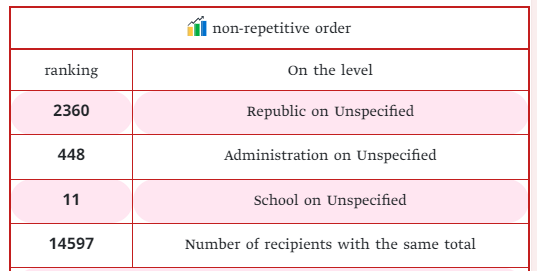

## repeat order Section
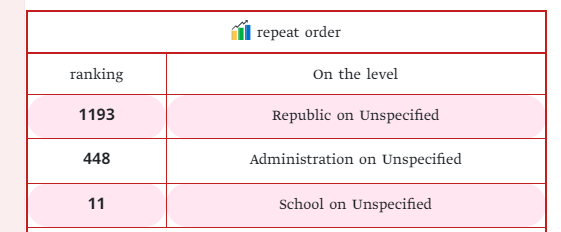

## Student Information
   
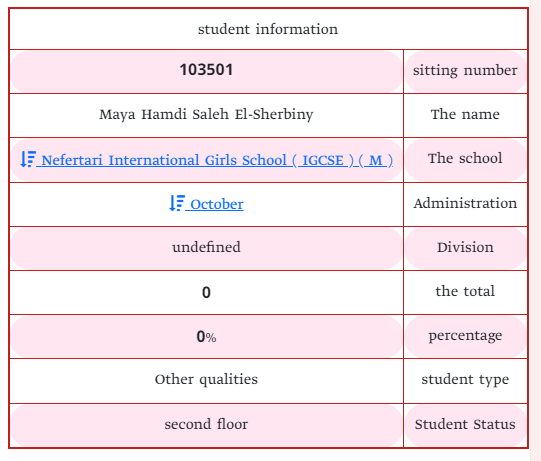
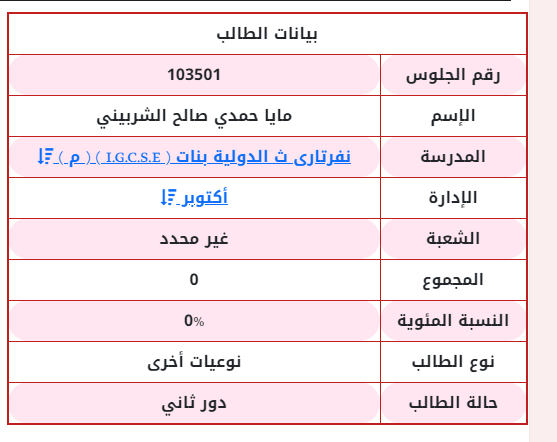
